In [1]:
import pandas as pd

df = pd.read_csv('IEA Global EV Data 2024.csv')

df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


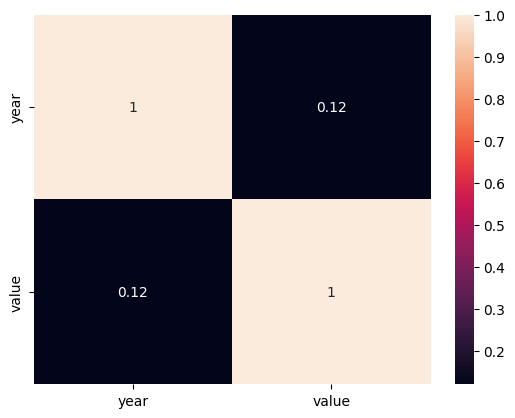

In [2]:
#heatmap of df
import seaborn as sns
import matplotlib.pyplot as plt
df_numeric = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(df_numeric.corr(), annot=True)
plt.show()

In [3]:
df.sort_values(by='year', ascending=True, inplace=True)

In [4]:
from statsmodels.tsa.stattools import adfuller, kpss

def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

adf_test(df['year'])
kpss_test(df['year'])


Results of Dickey-Fuller Test:
Test Statistic                     0.747268
p-value                            0.990735
#Lags Used                         0.000000
Number of Observations Used    12653.000000
Critical Value (1%)               -3.430867
Critical Value (5%)               -2.861768
Critical Value (10%)              -2.566892
dtype: float64
Results of KPSS Test:
Test Statistic           15.271944
p-value                   0.010000
Lags Used                69.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\sleep\AppData\Local\Temp\ipykernel_27408\651109975.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')


In [5]:
df['value_diff'] = df['value'].diff().dropna()

# Drop NaN values created by differencing
df_diff = df.dropna(subset=['value_diff'])

# ADF test on differenced data
adf_result_diff = adfuller(df_diff['value_diff'])
print('ADF Statistic (Differenced):', adf_result_diff[0])
print('p-value (Differenced):', adf_result_diff[1])
for key, value in adf_result_diff[4].items():
    print(f'Critical Value {key} (Differenced): {value}')

# KPSS test on differenced data
kpss_result_diff = kpss(df_diff['value_diff'], regression='c')
print('\nKPSS Statistic (Differenced):', kpss_result_diff[0])
print('p-value (Differenced):', kpss_result_diff[1])
for key, value in kpss_result_diff[3].items():
    print(f'Critical Value {key} (Differenced): {value}')

ADF Statistic (Differenced): -30.68452840405167
p-value (Differenced): 0.0
Critical Value 1% (Differenced): -3.4308685627010562
Critical Value 5% (Differenced): -2.86176917909594
Critical Value 10% (Differenced): -2.566891987053574

KPSS Statistic (Differenced): 0.011305383562878071
p-value (Differenced): 0.1
Critical Value 10% (Differenced): 0.347
Critical Value 5% (Differenced): 0.463
Critical Value 2.5% (Differenced): 0.574
Critical Value 1% (Differenced): 0.739


C:\Users\sleep\AppData\Local\Temp\ipykernel_27408\3669252042.py:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result_diff = kpss(df_diff['value_diff'], regression='c')


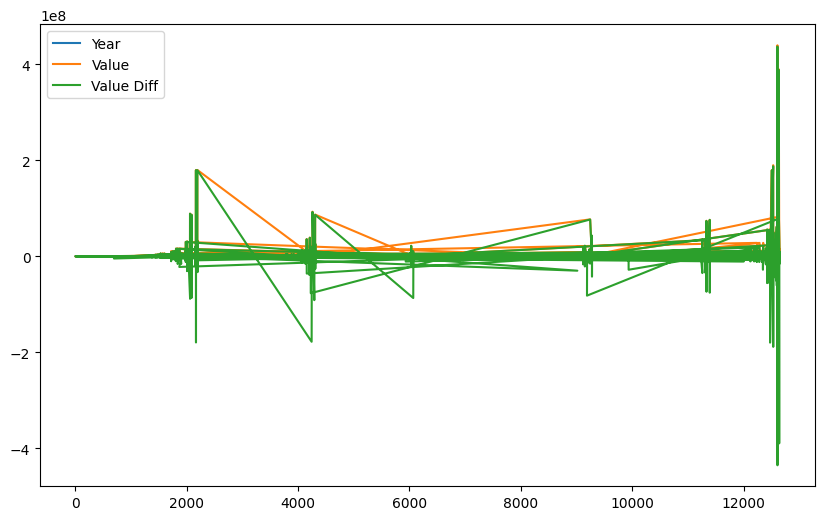

In [7]:
#rolling statistics
plt.figure(figsize=(10, 6))
plt.plot(df['year'], label='Year')
plt.plot(df['value'], label='Value')
plt.plot(df_diff['value_diff'], label='Value Diff')
plt.legend()
plt.show()

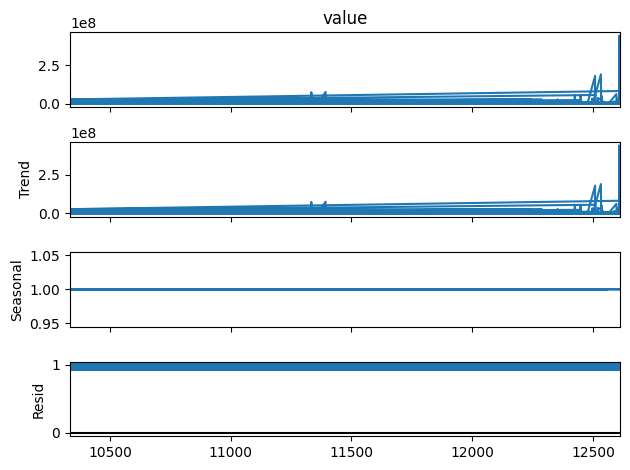

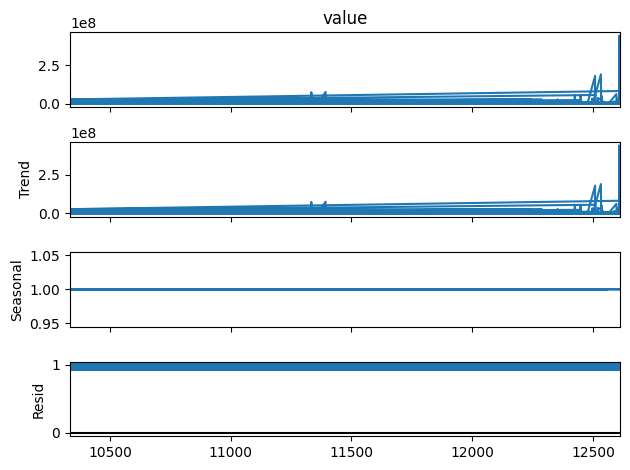

In [8]:
# time series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['value'], model='multiplicative', period=1)
result.plot()


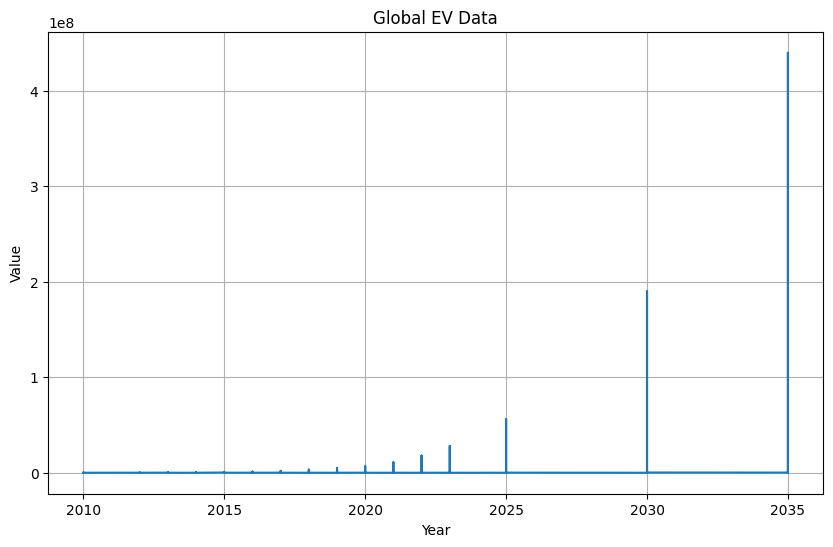

In [9]:
#time series plot
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['value'])
plt.title('Global EV Data')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid(True)
plt.show()


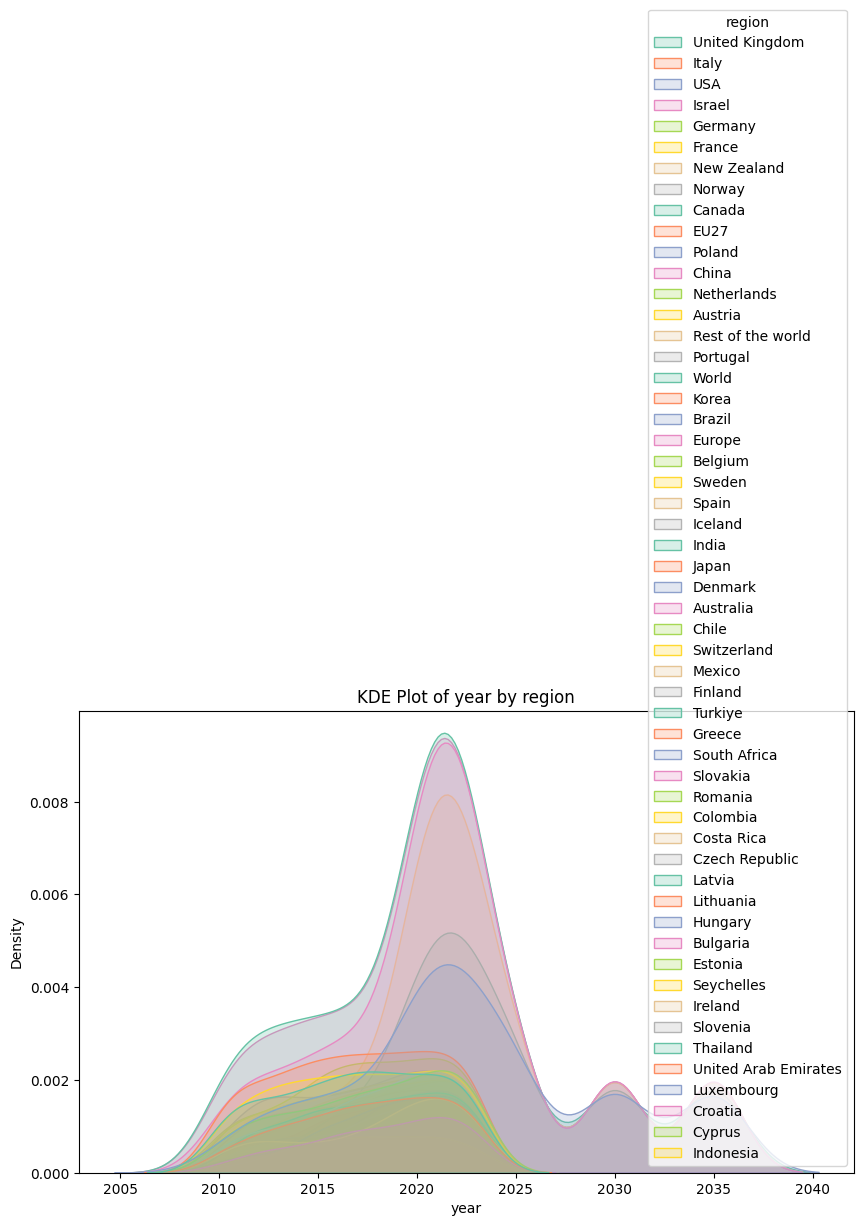

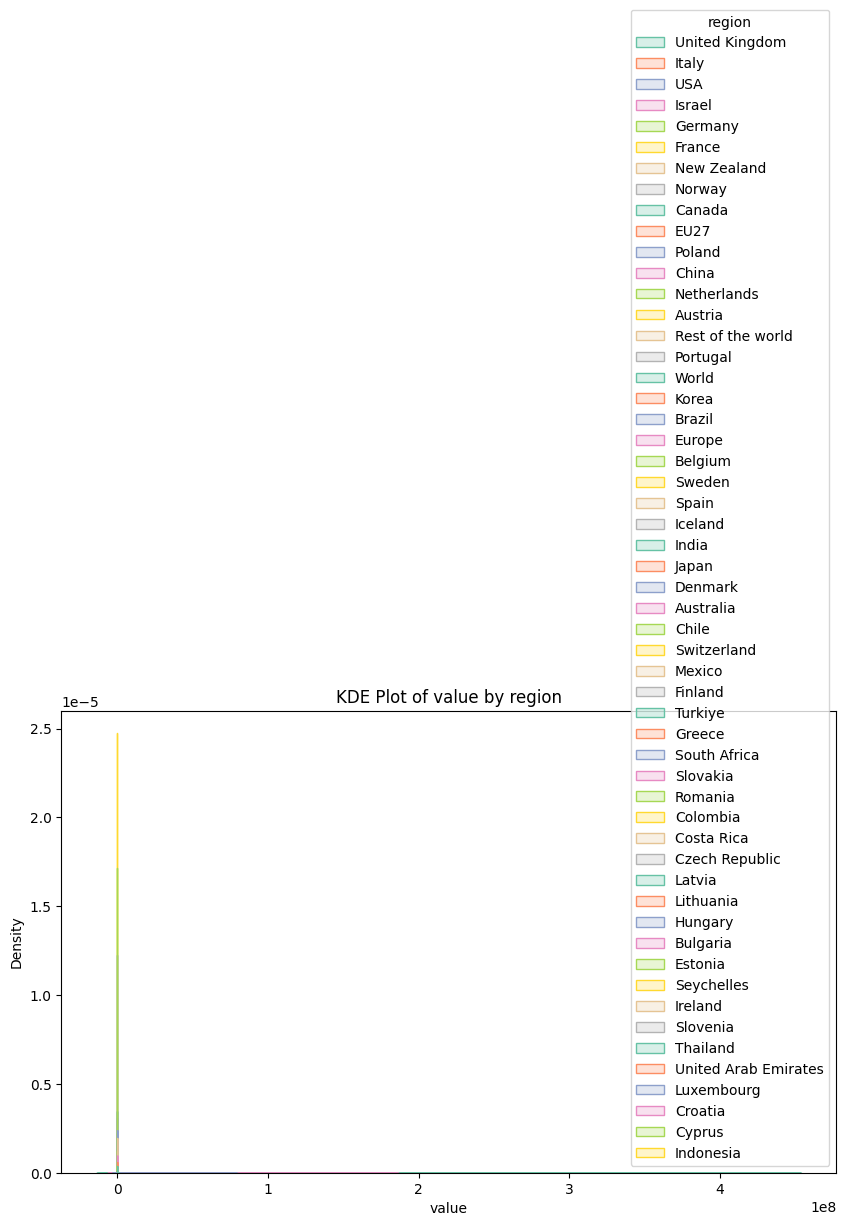

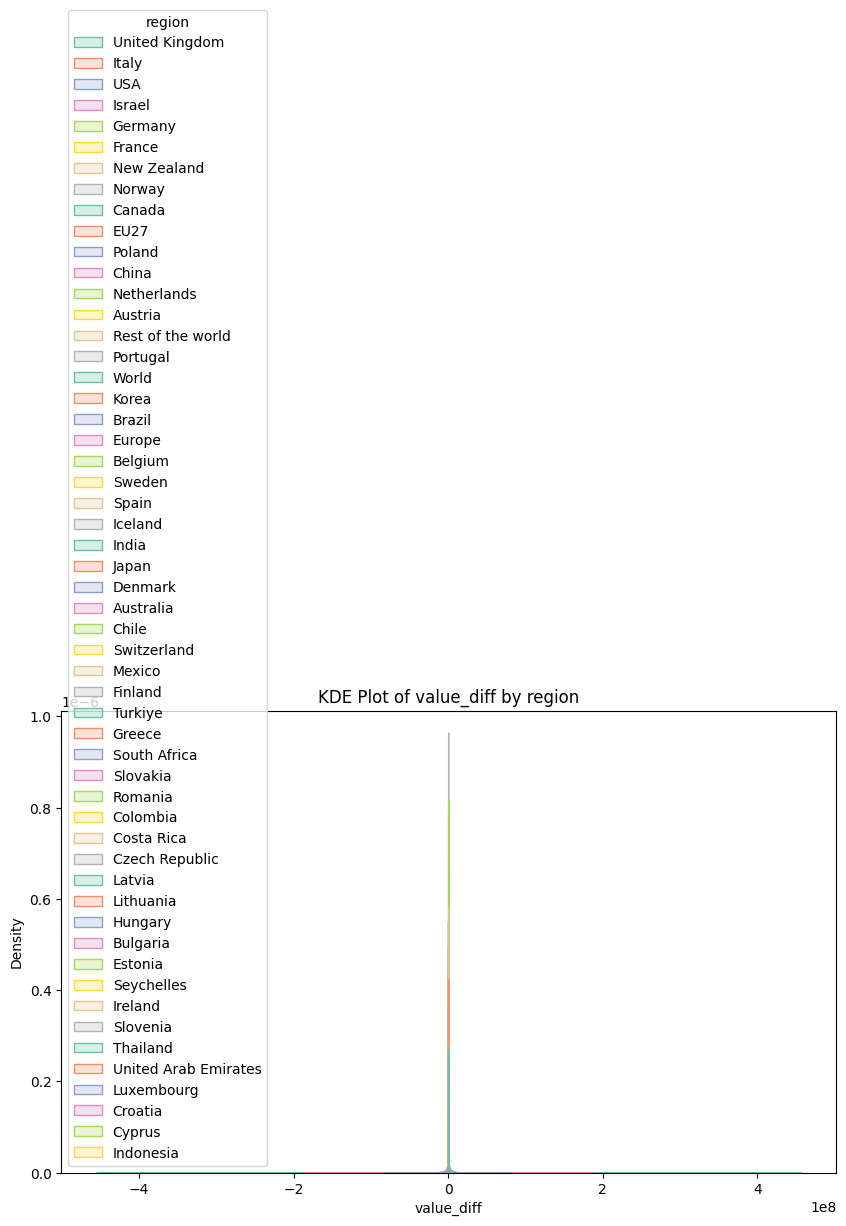

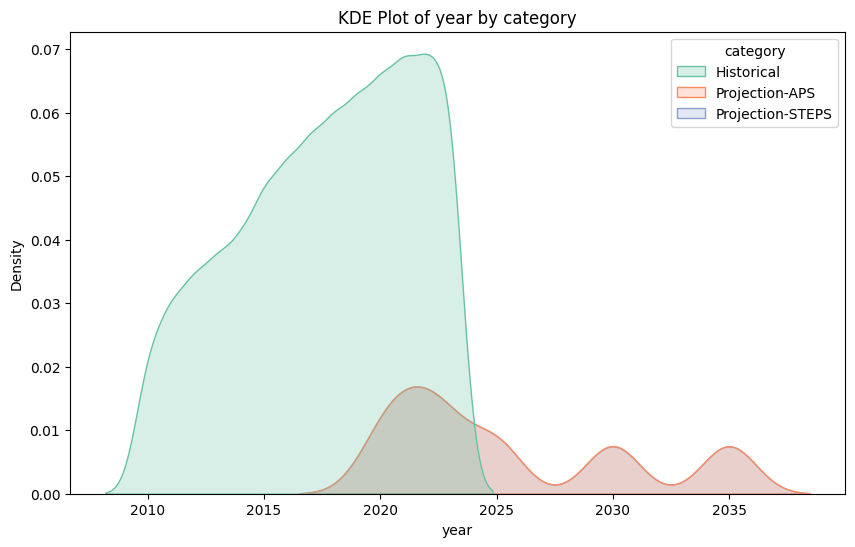

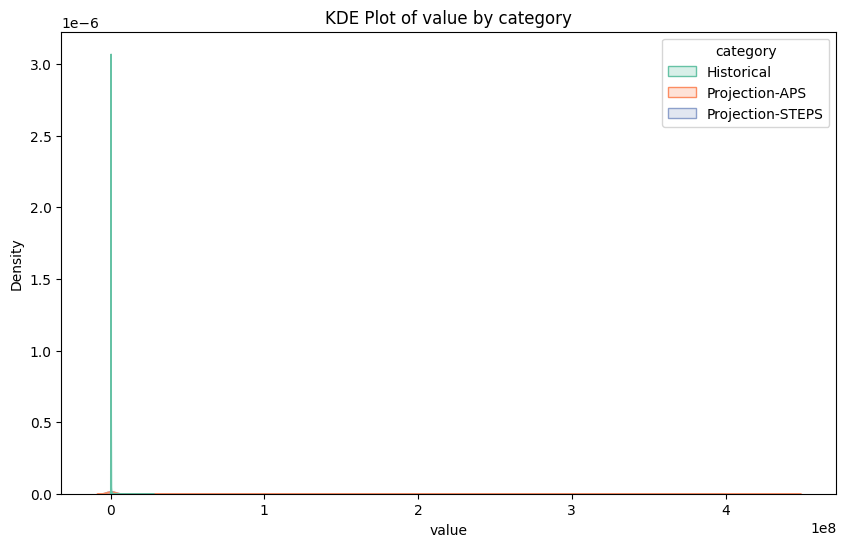

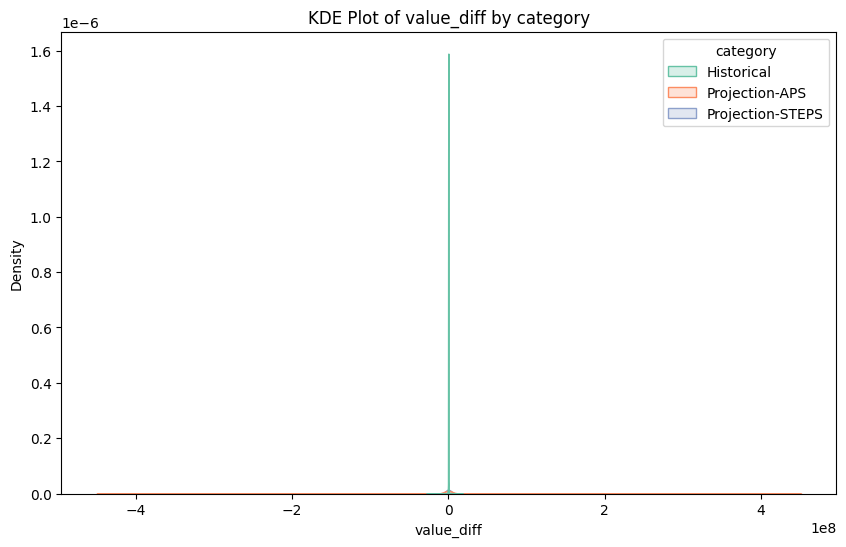

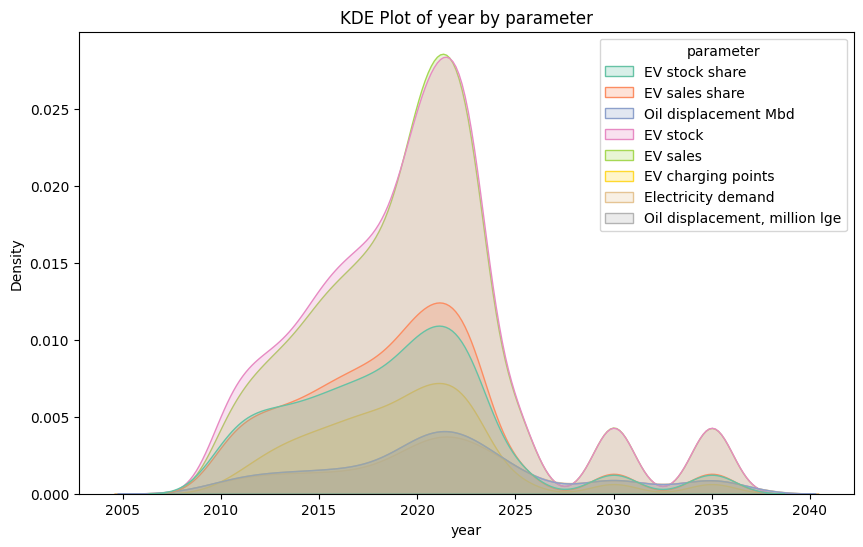

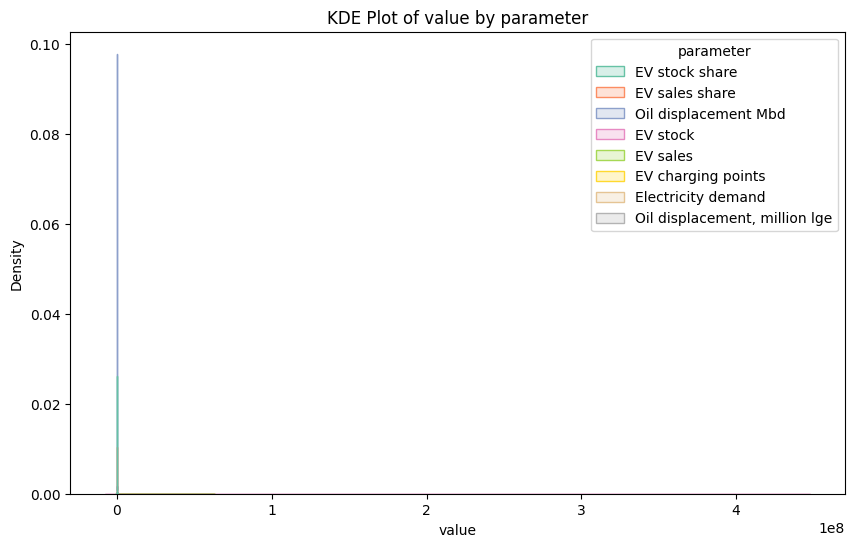

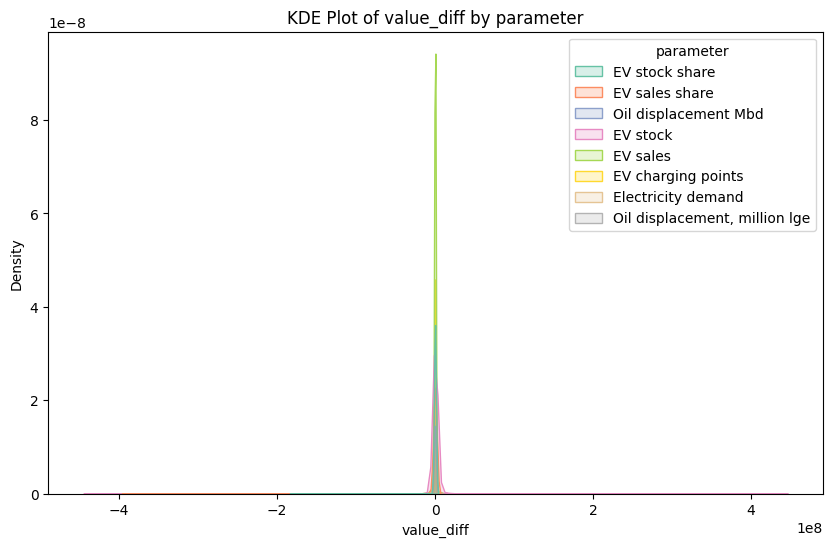

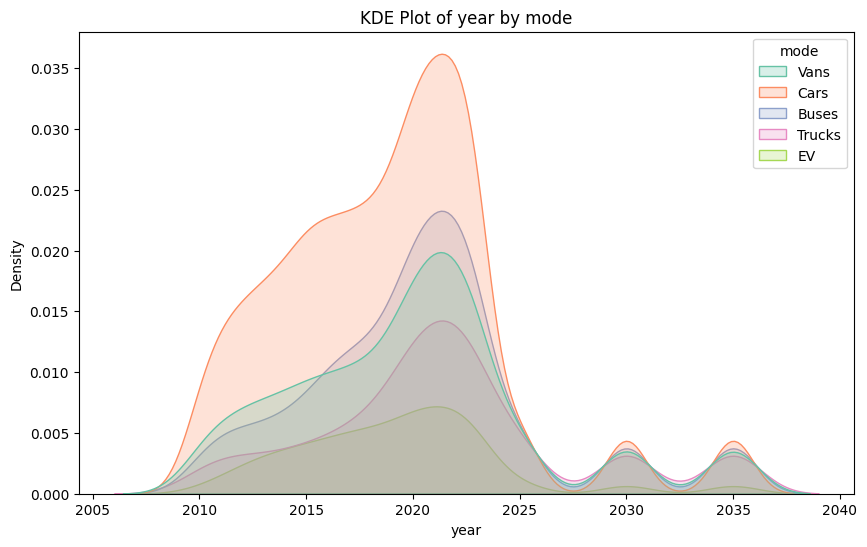

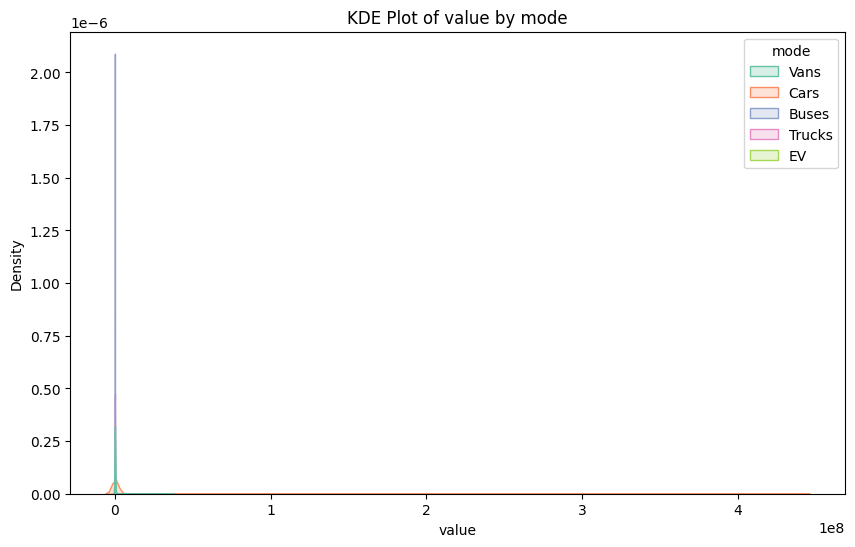

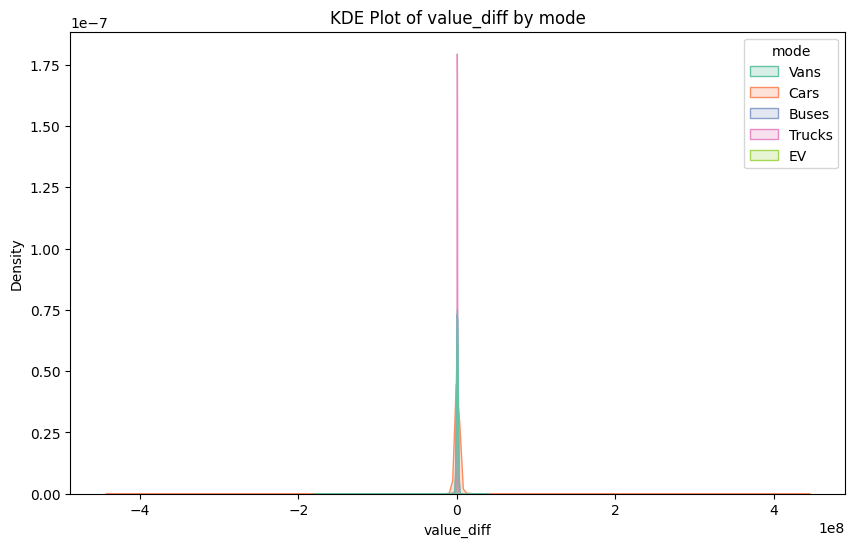

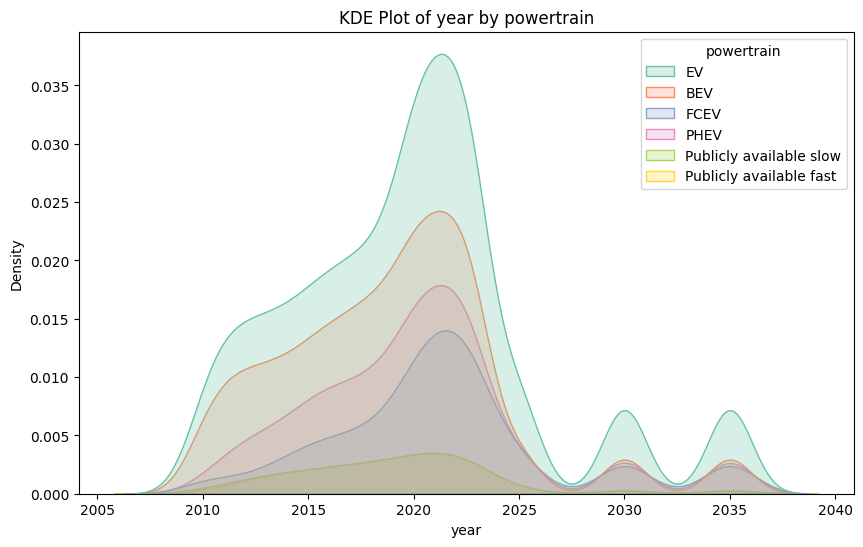

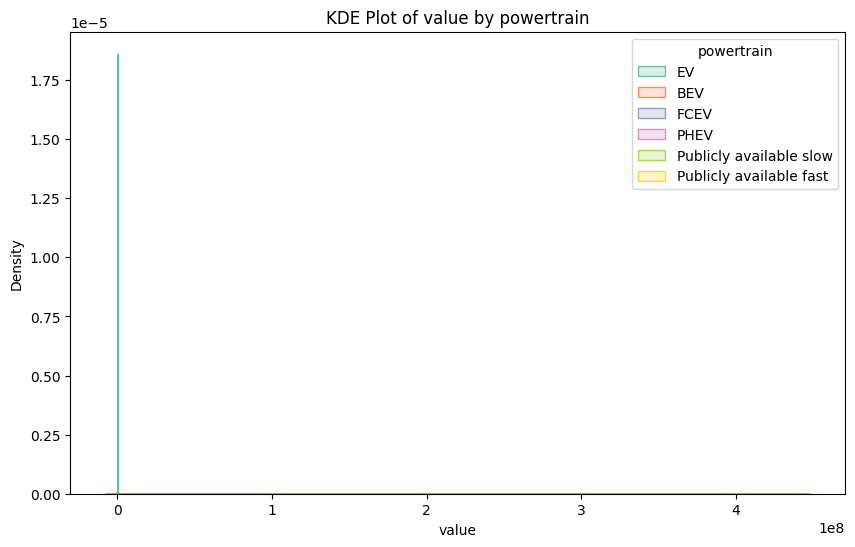

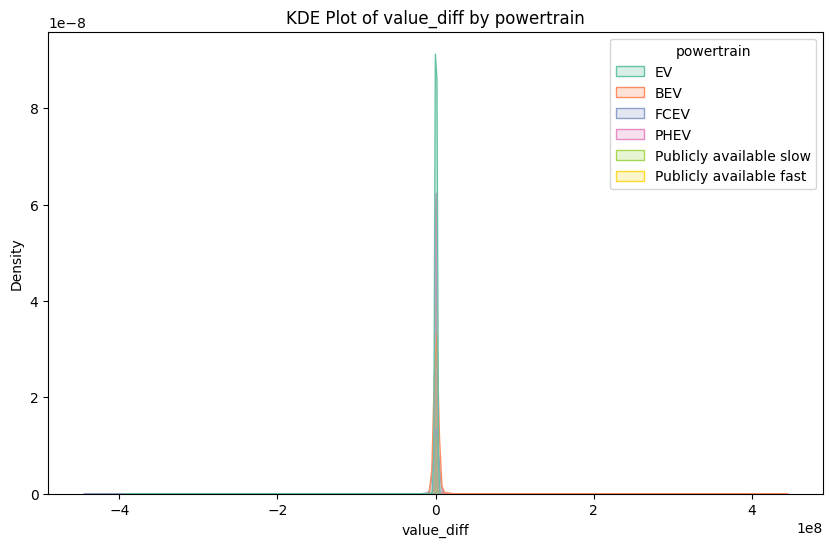

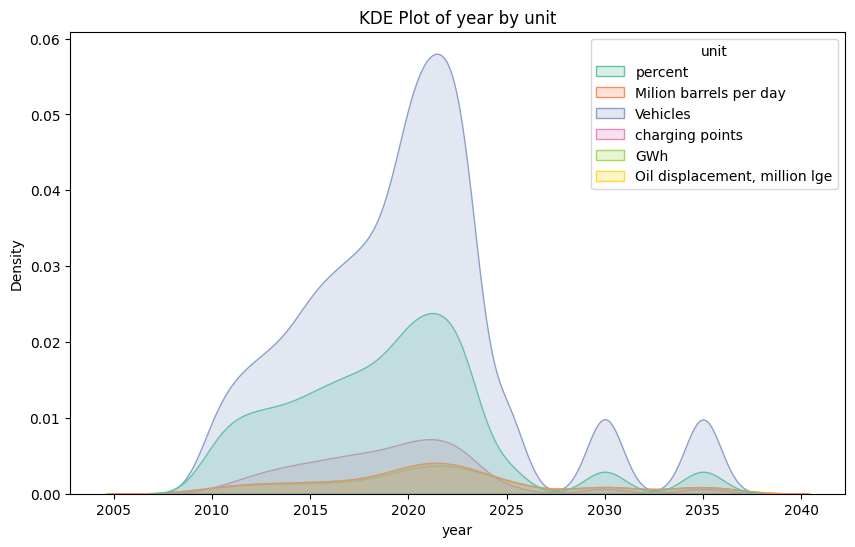

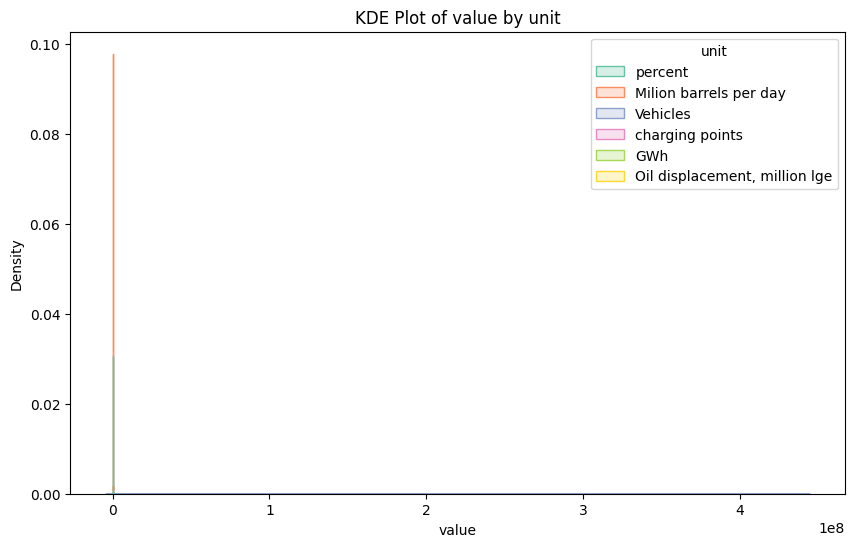

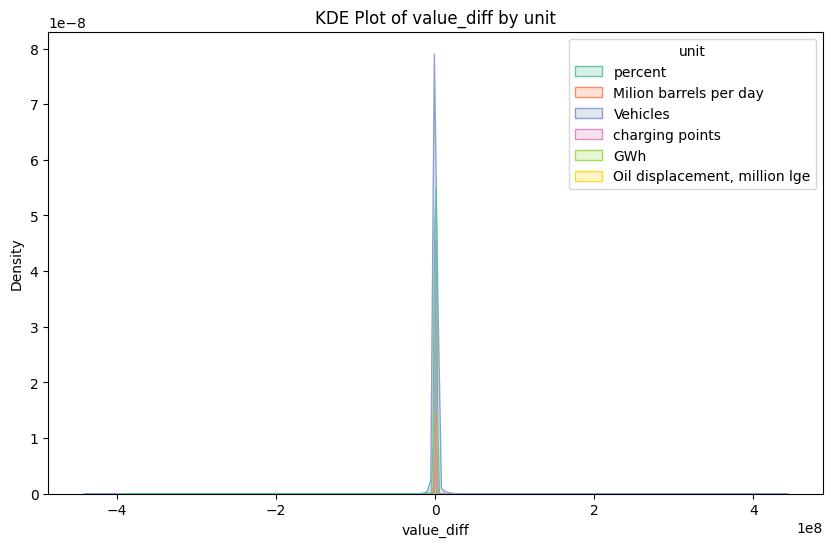

In [12]:
# If you have a categorical column, use it for hue
df_numeric = df.select_dtypes(include=['float64', 'int64'])
categorical_column = df.select_dtypes(include=['object'])
for catcol in categorical_column.columns:
    for col in df_numeric.columns:
        plt.figure(figsize=(10, 6))
        sns.kdeplot(data=df, x=col, hue=catcol, fill=True, palette='Set2')
        plt.title(f'KDE Plot of {col} by {catcol}')
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.show()